Falling ball. Imagine that a 50 cm diameter solid aliminum (density = 2700 kg/m3) ball is dropped from rest at 10,000 m. Consider the force of gravity (F = −mg $\hat{j}$) and numerically integrate particle position and velocity versus time. For simplicity, assume constant gravity (a = 9.81 m/s2) Terminate the simulation when the ball hits the ground (y = 0). Plot position and velocity versus time with both gravity and drag included. Derive an analytical expression for the velocity as a function of height and compare to your numerical predictions.


Analytical solution: v(y) = sqrt(2g(y0 - y))

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
def XtoL(x, dx, x0=0):
    return (x-x0)/dx

def gather(li, field):
    i = int(li)
    di = li - i 
    return field[i]*(1-di) + field[i+1]*di

# Set up forces
g = 9.81
rho = 2700
r = 0.5/2
m = 4/3 * rho * np.pi * r**3
F = -m*g

# Set up time steps and initial conditions
nt = int(450) # num of timesteps
dt = 1e-1 # timestep
t = np.linspace(0, nt*dt, nt)
y = 10e3
v = 0 - 0.5 * (F/m) * dt # rewind velocity
y_particle, v_particle = np.zeros(nt), np.zeros(nt)

# Solve
for k in range(nt):
    # integrate position and velocity
    v = v + F/m *dt
    y = y + v * dt
    y_particle[k] = y
    v_particle[k] = v
    


Text(0.5, 0, 'y / m')

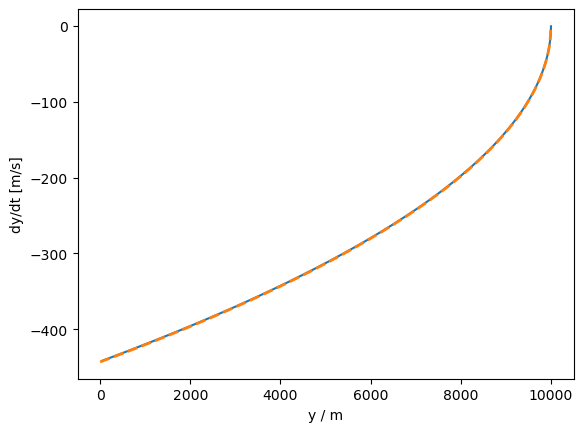

In [36]:
# Plotting
y_pred = np.linspace(0, 10e3, 500)
y0 = 10e3
plt.plot(y_particle, v_particle)
plt.plot(y_pred, -np.sqrt(2*g*(y0-y_pred)), linestyle='--', linewidth = 2)
plt.ylabel('dy/dt [m/s]')
plt.xlabel('y / m')